- This notebook uses the identified topics to explore some relationships between tasting notes and ABV, how tastes have changed over time and also I have validated my findings by comparing the trends observed with a different external dataset.

In [1]:
import pandas as pd
import numpy as np

from statistics import mean 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, ImageColorGenerator, random_color_func, get_single_color_func
from PIL import Image
import numpy as np

%matplotlib inline

# Loading Datasets:

- I am remaking a dataframe to plot charts as I don't have a combined one that has the beer rating as well as the allocated topics.

In [2]:
# Loading the beers with descriptions dataframe:
beers_with_desc = pd.read_csv('Datasets/beers_w_descriptions.csv')

In [3]:
# Loading the original dataframe with the ratings:
beers = pd.read_csv('Datasets/beers_data_cleaned.csv')

In [4]:
# Dropping beers with no description from the beers dataframe:
beers_with_desc2 = beers[beers['beer_desc']!='0']

In [5]:
beers_with_desc2 = beers_with_desc2.reset_index()
beers_with_desc2.head(3)

,index,name,brewery,beer_style,abv,date_added,available,num_ratings,rating,beer_desc,beer_style_group
0,0,Exalted,Thornbridge Brewery,Altbier,4.5,10/06/2016,1,542,3.70,Collaboration with Magic Rock,Other
1,1,Leaf,Orbit Beers London,Altbier,6.2,03/12/2014,1,783,3.67,Beechwood smoked malt meets a double altbier.\...,Other
2,2,Ctrl Alt Del,Wylam,Altbier,4.9,07/02/2016,1,318,3.65,12.4° Plato | OG 1050 | ABV 4.9%\n\nWylam & Le...,Other


In [6]:
# checking the two dfs are the same length:
print(len(beers_with_desc))
print(len(beers_with_desc2))

19373
19373


In [7]:
# Taking the rating from the beers df onto the beers with desc df (which has prepped words in the correct format)
beers_with_desc['rating'] = beers_with_desc2['rating']

In [8]:
# Checking to see it is the same order as above:
beers_with_desc.head(3)

,beer_style,abv,num_ratings,beer_style_group,prepped_words,month_added,year_added,successful,rating
0,Altbier,4.5,542,Other,"['collaboration', 'magic', 'rock']",10,2016,No,3.70
1,Altbier,6.2,783,Other,"['beechwood', 'smoked', 'meet', 'double', 'alt...",3,2014,No,3.67
2,Altbier,4.9,318,Other,"['plato', 'og', 'wylam', 'left', 'handed', 'gi...",7,2016,No,3.65


## Importing train and test split dfs:

In [9]:
X_train_w_words = pd.read_csv('Datasets/train_topics_w_words.csv')
X_test_w_words = pd.read_csv('Datasets/test_topics_w_words.csv')

In [10]:
train_df = Xy_train = pd.concat([X_train_w_words, X_test_w_words], axis=0)

In [11]:
# checking this df is the same as my original ones above:
len(train_df)

19373

In [12]:
train_df.head(3)

,Unnamed: 0,beer_style,abv,num_ratings,beer_style_group,prepped_words,month_added,year_added,Dominant_Topic,Topic_Perc_Contrib
0,0,Scottish Ale,5.2,342,Other,"['traditional', 'dark', 'amber', 'scottish', '...",5,2018,4.0,0.2573
1,1,Old Ale,5.0,1088,Other,"['dark', 'red', 'fruity', 'chocolate']",3,2012,6.0,0.1914
2,2,Lager - Winter,7.0,1479,Lager,"['colorado', 'winter', 'celebrated', 'maybe', ...",12,2015,2.0,0.2352


In [13]:
# Merging dfs based on multiple columns to get exact matches:
new_df = pd.merge(beers_with_desc, train_df,  how='left', on=['beer_style','abv', 'beer_style_group',
                                                              'num_ratings', 'month_added', 'year_added',
                                                              'prepped_words'])

In [14]:
# Dropping any rows with n/a and then any duplicates:
new_df = new_df.dropna()

In [15]:
new_df = new_df.drop_duplicates()

In [16]:
# One entry has been lost only:
len(new_df)

19372

In [17]:
new_df.head(3)

,beer_style,abv,num_ratings,beer_style_group,prepped_words,month_added,year_added,successful,rating,Unnamed: 0,Dominant_Topic,Topic_Perc_Contrib
0,Altbier,4.5,542,Other,"['collaboration', 'magic', 'rock']",10,2016,No,3.70,3790.0,2.0,0.1866
1,Altbier,6.2,783,Other,"['beechwood', 'smoked', 'meet', 'double', 'alt...",3,2014,No,3.67,6928.0,6.0,0.1959
2,Altbier,4.9,318,Other,"['plato', 'og', 'wylam', 'left', 'handed', 'gi...",7,2016,No,3.65,9541.0,5.0,0.3201


# Looking at Scatter Distribution by Topic:

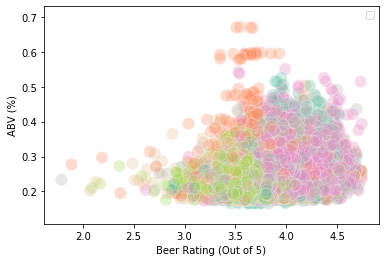

In [19]:
plt.figure()

X = new_df.rating
Y = new_df.Topic_Perc_Contrib
Z = new_df.Dominant_Topic

sns.scatterplot(data = new_df, x=X, y=Y, hue = Z, palette = "Set2", s=150, alpha = 0.3, edgecolor = 'white')

plt.xlabel('Beer Rating (Out of 5)')
plt.ylabel('ABV (%)')
plt.legend(())
plt.show()

- The above scatter is not very clear, it may be a good idea to get the averages of these columns to see a more clear insight into topic trends:

In [20]:
# Calculating means for each column in the dataframe I will plot according to each topic it is part of:

rating_means = []
topic_perc_cont_means = []
abv_means = []

for i in range(1, 7, 1):
    r = mean(new_df[new_df['Dominant_Topic']==i].rating)
    rating_means.append(r)
    t = mean(new_df[new_df['Dominant_Topic']==i].Topic_Perc_Contrib)
    topic_perc_cont_means.append(t)
    a = mean(new_df[new_df['Dominant_Topic']==i].abv)
    abv_means.append(a)

## Setting a custom color palette for each Topic:

- To retain consistency among my charts:

In [18]:
colors = ["#F0EC1F", "#BD1BB5", '#BD0800', '#F0BA00', '#00CFF0', '#483C32']
myPalette = sns.set_palette(colors, n_colors=6)

In [19]:
topics = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6',]

In [23]:
# Making these lists into a df:
scatter_df = pd.DataFrame(list(zip(topics, rating_means, topic_perc_cont_means)), 
               columns =['Topic', 'Rating_mean', 'Perc_Cont_mean']) 

## Plotting Average Rating vs Average Percentage Contribution to Topic:

- Percentage contribution to Topic refers to how much each keyword in the description of a beer is related to the Topic. I.e. how clearly that beer description represents the topic it has been sorted into.

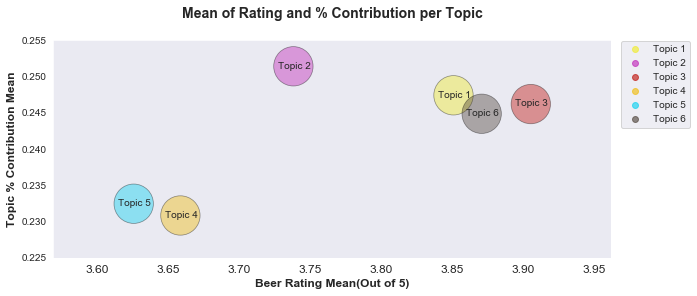

In [72]:
sns.set_style("dark")
plt.figure(figsize=(10,4))

X = scatter_df.Rating_mean
Y = scatter_df.Perc_Cont_mean
Z = scatter_df.Topic

ax = sns.scatterplot(data = new_df, x=X, y=Y, hue = Z, palette = myPalette, 
                s=1550, alpha = 0.4, edgecolor = 'black')

for i, txt in enumerate(Z):
    ax.annotate(txt, (X[i]-0.011, Y[i]-0.0003))                        # Annotating plot with "Topic X"
    
plt.xlabel('Beer Rating Mean(Out of 5)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Topic % Contribution Mean', fontsize = 12, fontweight = 'bold')
plt.title('Mean of Rating and % Contribution per Topic\n', fontsize = 14, fontweight = 'bold')
plt.ylim((0.225,0.255))
plt.xticks(fontsize=12)

handles, labels = ax.get_legend_handles_labels()

leg = plt.legend(handles=handles[1:], bbox_to_anchor=(1.15, 1.02),)   # Removing legend title
for lh in leg.legendHandles: 
    lh.set_alpha(0.6)                 # Setting alpha to same as plot

plt.show()

- We can see that Topics 1,3 and 6 all have significantly higher average ratings, and they also have higher Topic % contirbutions than Topic 4 and 5.

- Topic 2 looks to be an small outlier here, but it represents Collaboration beers (see the topic visualizations below). The takeaway from this graphic could be that collab beers are clear on the description of what they are (i.e. two breweries working together), but overall they are not as successful as beers with flavour profiles aligned to Topic 1, 3 and 6.

In [25]:
abv_scatter_df = pd.DataFrame(list(zip(topics, rating_means, abv_means)), 
               columns =['Topic', 'Rating_mean', 'Abv_mean']) 

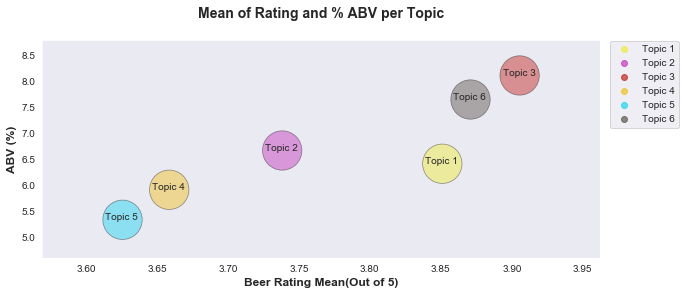

In [70]:
sns.set_style("dark")
plt.figure(figsize=(10,4))

X = abv_scatter_df.Rating_mean
Y = abv_scatter_df.Abv_mean
Z = abv_scatter_df.Topic

ax = sns.scatterplot(data = new_df, x=X, y=Y, hue = Z, palette = myPalette, 
                s=1550, alpha = 0.4, edgecolor = 'black')

for i, txt in enumerate(Z):
    ax.annotate(txt, (X[i]-0.012, Y[i]-0.002))
    
plt.xlabel('Beer Rating Mean(Out of 5)', fontsize = 12, fontweight = 'bold')
plt.ylabel('ABV (%)', fontsize = 12, fontweight = 'bold')
plt.title('Mean of Rating and % ABV per Topic\n', fontsize = 14, fontweight = 'bold')
plt.ylim((4.6, 8.8))

handles, labels = ax.get_legend_handles_labels()

leg = plt.legend(handles=handles[1:], bbox_to_anchor=(1.15, 1.02),)   # Removing legend title
for lh in leg.legendHandles: 
    lh.set_alpha(0.6)                 # Setting alpha to same as plot

plt.show()

- This provides further evidence of the association between ABV strength and rating, as generally there is a positive trend shown above.

- What we can also see is that Topic 3 and 6, which have the highest average ratings, also have the highest ABV. This may indicate why Topics were less important in the Random Forest Model as they appear to highly correlate with ABV strength, which was the second most important predictor.

# Topic Shape Clouds:

- The below list is from notebook 5 - Preparing X_train..., it is the top 100 words from each topic in my lda model, along with their associated contributions to that topic (i.e. how important they are to the topic):

In [27]:
list_cloud = [(0, '0.037*"dry" + 0.032*"fruit" + 0.026*"hopped" + 0.024*"citra" + 0.020*"tropical" + 0.020*"citrus" + 0.017*"mosaic" + 0.017*"oat" + 0.014*"double" + 0.013*"big" + 0.013*"juicy" + 0.011*"soft" + 0.011*"wheat" + 0.010*"simcoe" + 0.010*"mango" + 0.009*"pineapple" + 0.008*"galaxy" + 0.007*"amarillo" + 0.007*"peach" + 0.007*"juice" + 0.007*"grapefruit" + 0.007*"extra" + 0.007*"pine" + 0.007*"hazy" + 0.007*"amount" + 0.006*"cascade" + 0.006*"lime" + 0.006*"super" + 0.006*"base" + 0.006*"series" + 0.006*"mouthfeel" + 0.006*"favourite" + 0.005*"golden" + 0.005*"bill" + 0.005*"hoppy" + 0.005*"nelson" + 0.005*"stone" + 0.005*"chinook" + 0.005*"expect" + 0.005*"passionfruit" + 0.005*"dryhopped" + 0.005*"bright" + 0.005*"bit" + 0.004*"triple" + 0.004*"flaked" + 0.004*"huge" + 0.004*"apricot" + 0.004*"secret" + 0.004*"england" + 0.004*"centennial" + 0.004*"kettle" + 0.004*"heavy" + 0.004*"sauvin" + 0.004*"passion" + 0.004*"melon" + 0.004*"el" + 0.004*"addition" + 0.004*"motueka" + 0.004*"variety" + 0.004*"zealand" + 0.004*"resinous" + 0.003*"columbus" + 0.003*"featuring" + 0.003*"ripe" + 0.003*"dorado" + 0.003*"showcase" + 0.003*"vic" + 0.003*"massive" + 0.003*"india" + 0.003*"whirlpool" + 0.003*"punch" + 0.003*"malted" + 0.003*"tangerine" + 0.003*"low" + 0.003*"ddh" + 0.003*"bursting" + 0.003*"body" + 0.003*"hopping" + 0.003*"promise" + 0.003*"plenty" + 0.003*"dipa" + 0.003*"packed" + 0.003*"dank" + 0.003*"backed" + 0.003*"gluten" + 0.003*"green" + 0.003*"added" + 0.003*"loaded" + 0.003*"cryo" + 0.003*"london" + 0.003*"ekuanot" + 0.003*"milkshake" + 0.002*"session" + 0.002*"azacca" + 0.002*"brut" + 0.002*"nz" + 0.002*"grist" + 0.002*"guava" + 0.002*"kg" + 0.002*"enigma"'), (1, '0.014*"time" + 0.014*"collaboration" + 0.010*"friend" + 0.010*"make" + 0.010*"day" + 0.009*"back" + 0.009*"good" + 0.007*"love" + 0.007*"enjoy" + 0.006*"release" + 0.006*"world" + 0.006*"drink" + 0.006*"craft" + 0.005*"nt" + 0.005*"inspired" + 0.005*"special" + 0.005*"thing" + 0.004*"part" + 0.004*"named" + 0.004*"recipe" + 0.004*"original" + 0.004*"life" + 0.004*"bar" + 0.004*"festival" + 0.004*"great" + 0.004*"celebrate" + 0.004*"lot" + 0.004*"hand" + 0.004*"west" + 0.004*"long" + 0.003*"brewdog" + 0.003*"work" + 0.003*"side" + 0.003*"uk" + 0.003*"series" + 0.003*"bring" + 0.003*"put" + 0.003*"result" + 0.003*"decided" + 0.003*"team" + 0.003*"local" + 0.003*"designed" + 0.003*"find" + 0.003*"home" + 0.003*"north" + 0.003*"collab" + 0.003*"originally" + 0.003*"enjoyed" + 0.003*"city" + 0.003*"season" + 0.003*"company" + 0.003*"making" + 0.002*"northern" + 0.002*"form" + 0.002*"created" + 0.002*"celebration" + 0.002*"pint" + 0.002*"place" + 0.002*"open" + 0.002*"family" + 0.002*"mind" + 0.002*"wanted" + 0.002*"experimental" + 0.002*"rock" + 0.002*"man" + 0.002*"top" + 0.002*"amazing" + 0.002*"experience" + 0.002*"hard" + 0.002*"star" + 0.002*"born" + 0.002*"people" + 0.002*"range" + 0.002*"set" + 0.002*"bigger" + 0.002*"started" + 0.002*"century" + 0.002*"show" + 0.002*"taking" + 0.002*"australia" + 0.002*"straight" + 0.002*"inspiration" + 0.002*"share" + 0.002*"party" + 0.002*"called" + 0.002*"mountain" + 0.002*"fun" + 0.002*"hope" + 0.002*"st" + 0.002*"coast" + 0.002*"birthday" + 0.002*"island" + 0.002*"collabfest" + 0.002*"homage" + 0.002*"turn" + 0.002*"brother" + 0.002*"found" + 0.002*"sip" + 0.002*"heart" + 0.002*"california"'), (2, '0.054*"barrel" + 0.040*"aged" + 0.022*"bourbon" + 0.021*"oak" + 0.020*"sour" + 0.018*"fermented" + 0.014*"cider" + 0.012*"rye" + 0.012*"wine" + 0.012*"cherry" + 0.011*"apple" + 0.011*"honey" + 0.011*"tart" + 0.011*"red" + 0.010*"raspberry" + 0.010*"fresh" + 0.009*"fermentation" + 0.008*"wild" + 0.007*"blended" + 0.007*"batch" + 0.007*"complexity" + 0.006*"conditioned" + 0.006*"whiskey" + 0.006*"grape" + 0.005*"saison" + 0.005*"french" + 0.005*"collaboration" + 0.005*"barrelaged" + 0.005*"blueberry" + 0.005*"result" + 0.005*"version" + 0.005*"strawberry" + 0.004*"whisky" + 0.004*"anniversary" + 0.004*"culture" + 0.004*"pear" + 0.004*"farmhouse" + 0.004*"unique" + 0.004*"mixed" + 0.004*"age" + 0.004*"blackberry" + 0.004*"added" + 0.004*"grown" + 0.004*"acidity" + 0.004*"aging" + 0.003*"small" + 0.003*"limited" + 0.003*"cask" + 0.003*"mead" + 0.003*"local" + 0.003*"farm" + 0.003*"brettanomyces" + 0.003*"resulting" + 0.003*"hill" + 0.003*"de" + 0.003*"berry" + 0.003*"berliner" + 0.003*"project" + 0.003*"pink" + 0.003*"naturally" + 0.003*"weisse" + 0.003*"recipe" + 0.003*"natural" + 0.003*"process" + 0.003*"tartness" + 0.003*"selected" + 0.003*"edition" + 0.003*"raw" + 0.003*"spirit" + 0.002*"barleywine" + 0.002*"locally" + 0.002*"flower" + 0.002*"mash" + 0.002*"wort" + 0.002*"matured" + 0.002*"base" + 0.002*"tank" + 0.002*"release" + 0.002*"brett" + 0.002*"conditioning" + 0.002*"table" + 0.002*"brandy" + 0.002*"blending" + 0.002*"ferment" + 0.002*"funk" + 0.002*"heaven" + 0.002*"carefully" + 0.002*"depth" + 0.002*"champagne" + 0.002*"single" + 0.002*"pound" + 0.002*"soured" + 0.002*"funky" + 0.002*"fall" + 0.002*"magic" + 0.002*"refermented" + 0.002*"harvest" + 0.002*"belgium" + 0.002*"ready" + 0.002*"scotch"'), (3, '0.023*"bitterness" + 0.020*"full" + 0.018*"balanced" + 0.017*"orange" + 0.016*"give" + 0.013*"body" + 0.013*"sweetness" + 0.013*"bitter" + 0.013*"smooth" + 0.013*"sweet" + 0.013*"malty" + 0.012*"spice" + 0.012*"palate" + 0.011*"balance" + 0.011*"strong" + 0.010*"colour" + 0.010*"english" + 0.010*"red" + 0.010*"nose" + 0.010*"deep" + 0.009*"subtle" + 0.009*"caramel" + 0.009*"head" + 0.008*"addition" + 0.008*"crystal" + 0.008*"amber" + 0.008*"bodied" + 0.007*"fruit" + 0.007*"complex" + 0.007*"touch" + 0.006*"medium" + 0.006*"barley" + 0.006*"intense" + 0.006*"bold" + 0.005*"alcohol" + 0.005*"color" + 0.005*"high" + 0.005*"fruity" + 0.005*"biscuit" + 0.005*"glass" + 0.005*"earthy" + 0.005*"combine" + 0.005*"real" + 0.004*"peel" + 0.004*"rounded" + 0.004*"slight" + 0.004*"beautiful" + 0.004*"backbone" + 0.004*"salt" + 0.004*"warming" + 0.004*"mouthfeel" + 0.004*"slightly" + 0.004*"gose" + 0.004*"end" + 0.004*"lingering" + 0.004*"sea" + 0.004*"perfectly" + 0.004*"golding" + 0.004*"pours" + 0.004*"scottish" + 0.004*"long" + 0.004*"irish" + 0.003*"mouth" + 0.003*"feel" + 0.003*"late" + 0.003*"thick" + 0.003*"round" + 0.003*"single" + 0.003*"otter" + 0.003*"gentle" + 0.003*"toasty" + 0.003*"beautifully" + 0.003*"copper" + 0.003*"east" + 0.003*"christmas" + 0.003*"carbonation" + 0.003*"nice" + 0.003*"true" + 0.003*"aftertaste" + 0.003*"combination" + 0.003*"load" + 0.003*"toffee" + 0.003*"berry" + 0.003*"distinctive" + 0.003*"vegan" + 0.003*"present" + 0.003*"appearance" + 0.003*"depth" + 0.003*"ruby" + 0.003*"hit" + 0.002*"offer" + 0.002*"mari" + 0.002*"creating" + 0.002*"flavoured" + 0.002*"coloured" + 0.002*"bite" + 0.002*"unique" + 0.002*"including" + 0.002*"kick" + 0.002*"pleasant"'), (4, '0.036*"yeast" + 0.025*"light" + 0.019*"crisp" + 0.019*"refreshing" + 0.017*"belgian" + 0.016*"classic" + 0.016*"wheat" + 0.014*"clean" + 0.014*"traditional" + 0.014*"fruity" + 0.012*"pilsner" + 0.012*"perfect" + 0.012*"white" + 0.011*"spicy" + 0.010*"taste" + 0.010*"summer" + 0.010*"lemon" + 0.009*"fresh" + 0.009*"golden" + 0.009*"floral" + 0.007*"drinking" + 0.007*"easy" + 0.007*"australian" + 0.006*"strain" + 0.006*"barley" + 0.006*"banana" + 0.006*"delicate" + 0.006*"munich" + 0.006*"water" + 0.006*"profile" + 0.006*"ginger" + 0.005*"inspired" + 0.005*"mild" + 0.005*"hoppy" + 0.005*"citrus" + 0.005*"blonde" + 0.004*"twist" + 0.004*"aromatic" + 0.004*"lightly" + 0.004*"great" + 0.004*"modern" + 0.004*"clove" + 0.004*"world" + 0.004*"drinkable" + 0.004*"create" + 0.004*"unfiltered" + 0.004*"noble" + 0.004*"provide" + 0.004*"produce" + 0.004*"herbal" + 0.004*"saaz" + 0.004*"vienna" + 0.004*"grain" + 0.004*"british" + 0.004*"bread" + 0.004*"low" + 0.003*"bright" + 0.003*"ester" + 0.003*"subtle" + 0.003*"hallertau" + 0.003*"session" + 0.003*"czech" + 0.003*"quality" + 0.003*"strength" + 0.003*"malted" + 0.003*"week" + 0.003*"finest" + 0.003*"tradition" + 0.003*"crafted" + 0.003*"rye" + 0.003*"coriander" + 0.003*"slightly" + 0.003*"zest" + 0.003*"pils" + 0.003*"al" + 0.003*"produced" + 0.003*"leaf" + 0.003*"tea" + 0.003*"bavarian" + 0.003*"unique" + 0.003*"pepper" + 0.003*"citrusy" + 0.003*"bready" + 0.003*"pure" + 0.003*"pair" + 0.002*"rice" + 0.002*"served" + 0.002*"thirst" + 0.002*"characteristic" + 0.002*"premium" + 0.002*"zesty" + 0.002*"food" + 0.002*"temperature" + 0.002*"hefeweizen" + 0.002*"germany" + 0.002*"feature" + 0.002*"variety" + 0.002*"compliment" + 0.002*"make" + 0.002*"combination"'), (5, '0.039*"coffee" + 0.039*"dark" + 0.038*"chocolate" + 0.031*"vanilla" + 0.029*"rich" + 0.018*"black" + 0.016*"roasted" + 0.015*"porter" + 0.014*"sweet" + 0.012*"sugar" + 0.012*"bean" + 0.011*"smooth" + 0.011*"coconut" + 0.011*"lactose" + 0.010*"creamy" + 0.010*"milk" + 0.010*"caramel" + 0.008*"complex" + 0.008*"toasted" + 0.008*"cinnamon" + 0.008*"cold" + 0.008*"winter" + 0.008*"added" + 0.007*"maple" + 0.007*"smoked" + 0.007*"nib" + 0.007*"delicious" + 0.006*"cacao" + 0.006*"roast" + 0.006*"cocoa" + 0.006*"create" + 0.005*"toffee" + 0.005*"syrup" + 0.005*"infused" + 0.005*"version" + 0.005*"taste" + 0.005*"warm" + 0.005*"cream" + 0.004*"layer" + 0.004*"gold" + 0.004*"base" + 0.004*"gab" + 0.004*"peanut" + 0.004*"robust" + 0.004*"silky" + 0.004*"decadent" + 0.004*"finished" + 0.004*"roasty" + 0.004*"big" + 0.004*"raisin" + 0.004*"rum" + 0.003*"treat" + 0.003*"espresso" + 0.003*"award" + 0.003*"hazelnut" + 0.003*"oatmeal" + 0.003*"medal" + 0.003*"night" + 0.003*"dessert" + 0.003*"marshmallow" + 0.003*"special" + 0.003*"butter" + 0.003*"seasonal" + 0.003*"ice" + 0.003*"start" + 0.003*"nutty" + 0.003*"cake" + 0.003*"spiced" + 0.003*"winner" + 0.003*"velvety" + 0.003*"smoke" + 0.003*"luscious" + 0.003*"fullbodied" + 0.002*"favorite" + 0.002*"breakfast" + 0.002*"molasses" + 0.002*"layered" + 0.002*"candy" + 0.002*"liquid" + 0.002*"wood" + 0.002*"winning" + 0.002*"pie" + 0.002*"cup" + 0.002*"nut" + 0.002*"smoky" + 0.002*"mix" + 0.002*"baltic" + 0.002*"toast" + 0.002*"roaster" + 0.002*"fire" + 0.002*"international" + 0.002*"madagascar" + 0.002*"irish" + 0.002*"pumpkin" + 0.002*"glass" + 0.002*"burnt" + 0.002*"almond" + 0.002*"nutmeg" + 0.002*"freshly" + 0.002*"mellow"')]

In [28]:
# Creating a function to loop through the list_cloud above and extract the words and their weights per topic:

def word_weights_cloud(lda_topic_list):
    topic_words = []
    for topic_tuple in lda_topic_list:
        topic_ww = [word.strip(' ').strip('"') for word in topic_tuple[1].split('+')]
        word_dict = {}
        for i in topic_ww:
            v,w = i.split('*"')
            word_dict[w] = float(v)
        topic_words.append(word_dict)
    return topic_words

In [29]:
# Using the function above:
topicwords = word_weights_cloud(list_cloud)

In [30]:
# Creating a shape for the wordcloud to fit on:
mask = np.array(Image.open('Figures/pint.png'))

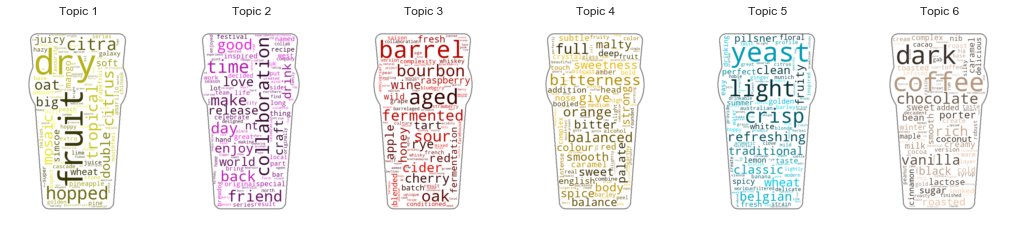

In [31]:
fig, ax = plt.subplots(1, 6, figsize=(18,8))

# Looping through each topic and plotting accordingly
for i in range(6):
    wc = WordCloud(mask=mask, background_color="white",
                   random_state=20, width=mask.shape[1],
                   height=mask.shape[0], contour_width=3, contour_color='grey')
    wc.generate_from_frequencies(topicwords[i])
    ax[i].imshow(wc.recolor(color_func = get_single_color_func(colors[i]),   #creates a color for each topic
                            random_state = 42), interpolation="bilinear")
    ax[i].axis('off')
    ax[i].set_title(topics[i])

plt.show()

# Topics Over Time:

## Annual:

In [32]:
new_df.head(3)

,beer_style,abv,num_ratings,beer_style_group,prepped_words,month_added,year_added,successful,rating,Unnamed: 0,Dominant_Topic,Topic_Perc_Contrib
0,Altbier,4.5,542,Other,"['collaboration', 'magic', 'rock']",10,2016,No,3.70,3790.0,2.0,0.1866
1,Altbier,6.2,783,Other,"['beechwood', 'smoked', 'meet', 'double', 'alt...",3,2014,No,3.67,6928.0,6.0,0.1959
2,Altbier,4.9,318,Other,"['plato', 'og', 'wylam', 'left', 'handed', 'gi...",7,2016,No,3.65,9541.0,5.0,0.3201


In [20]:
tcs_df = new_df.groupby(['year_added', 'Dominant_Topic'])["Dominant_Topic"].count().reset_index(name = 'count_topics')

In [34]:
rat_df = new_df.groupby(['year_added', 'Dominant_Topic'])["rating"].mean().reset_index(name = 'rating_av')

In [35]:
top_over_time_df = pd.merge(tcs_df, rat_df, on=['year_added', 'Dominant_Topic'], how='inner')

In [36]:
top_over_time_df.head()

,year_added,Dominant_Topic,count_topics,rating_av
0,2010,1.0,13,3.860000
1,2010,2.0,68,3.648088
2,2010,3.0,65,3.895692
3,2010,4.0,121,3.632727
4,2010,5.0,80,3.488375


## Annual Trend Bubble Chart:
- Shown using size of bubble to denote number of beers of each topic.

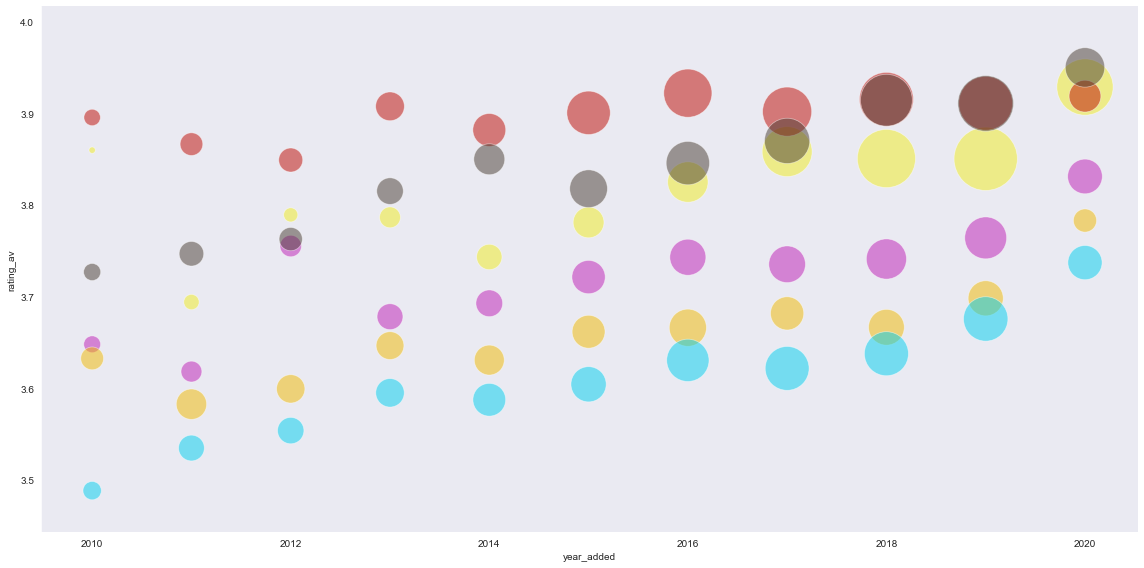

In [37]:
sns.relplot(x="year_added", y="rating_av", hue="Dominant_Topic", size="count_topics",
            sizes=(40, 4000), alpha=.5, 
            palette=sns.color_palette(myPalette, top_over_time_df.Dominant_Topic.unique().shape[0]), 
            height=8, data=top_over_time_df, aspect = 2, legend = False )

plt.show()

- Above plot shows the count of the number of beers added as size of the scatter 'bubbles', it can be hard to see how much a particular topic takes up of the share each year as there are more beers added the longer the platform has existed.

In [38]:
top_over_time_df['count_share'] = top_over_time_df['count_topics'] / top_over_time_df.groupby(['year_added'])['count_topics'].transform('sum')*100

In [39]:
tot_pivot = top_over_time_df.pivot(index="year_added", columns="Dominant_Topic", values="rating_av").reset_index()

In [40]:
tot_pivot.rename(columns={1.0: 'Topic_1', 2.0: 'Topic_2', 3.0: 'Topic_3', 4.0: 'Topic_4',
                         5.0: 'Topic_5', 6.0: 'Topic_6'}, inplace=True)

In [41]:
tot_pivot.head(3)

Dominant_Topic,year_added,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,2010,3.860000,3.648088,3.895692,3.632727,3.488375,3.727000
1,2011,3.694211,3.618333,3.866583,3.582736,3.534870,3.746929
2,2012,3.789388,3.755370,3.849254,3.599459,3.553913,3.762937


## Annual Bubble and line plot:
- This time altering size by proportion of beers in each topic in a given year. This should allow for a better comparison across years.

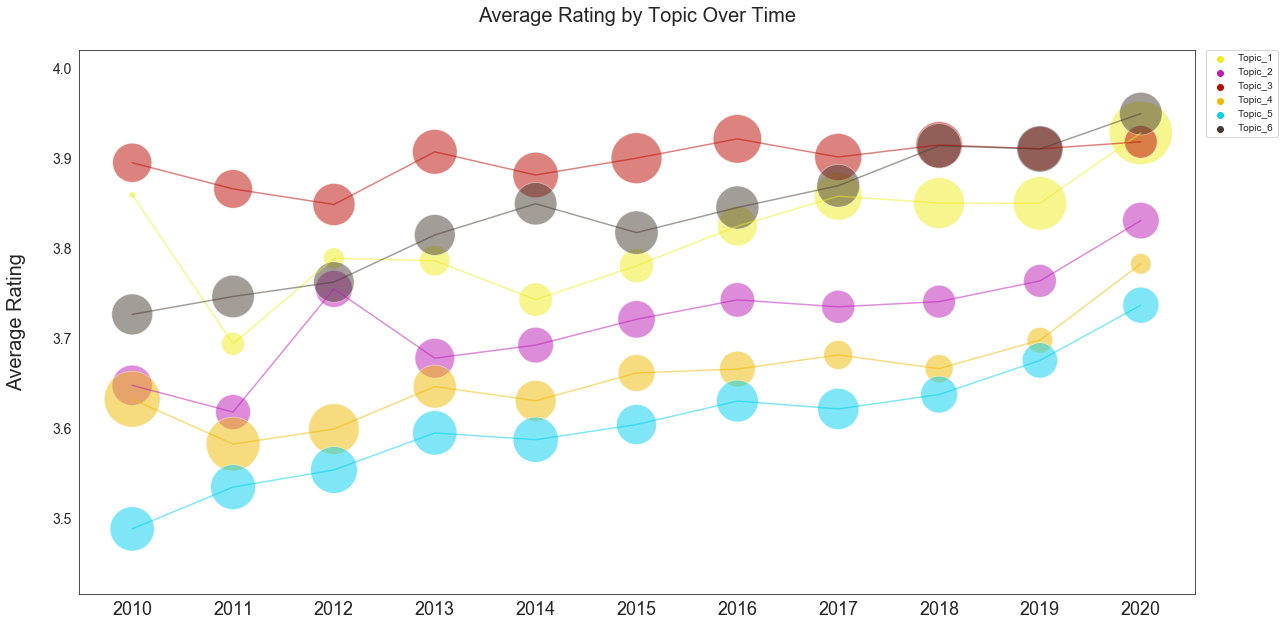

In [47]:
sns.set_style("white")

plt.figure(figsize=(20,10))

g = sns.scatterplot(x="year_added", y="rating_av", hue="Dominant_Topic", size="count_share",
            sizes=(40, 4000), alpha=.5, 
            palette=sns.color_palette(myPalette, top_over_time_df.Dominant_Topic.unique().shape[0]), 
            data=top_over_time_df)

topic_lst = ['Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6',]

#Plotting lines between scatterplots:
for i in range(6):
    plt.plot('year_added', topic_lst[i], data=tot_pivot, color= colors[i], alpha=0.5)

# Annotating
plt.xlabel("")
plt.xticks(tot_pivot.year_added, fontsize = '18')
plt.ylabel('Average Rating\n', fontsize = '20')
plt.yticks(fontsize = '14')
plt.title('Average Rating by Topic Over Time\n', fontsize = '20')

# Removing size legend handle:
h,l = g.get_legend_handles_labels()
plt.legend(h[7:13],l[0:6],bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


#plt.axis(False)

plt.show()

- As we can see this chart is more clear, and shows some interesting trends, such as the yellow bubble (Topic 1) growing much larger from 2010 to 2020 while the orange bubble (Topic 4) shrinks. I will produce a graphic below to even more clearly evaulate this trend.
- This was likely brewers responding to the higher average ratings for Topic 1 over Topic 4, and they appear to be substitutes for one another, we will look into this in more detail below.
- It is also interesting to note that generally ratings have been increasing over time. This was reflected in our model where year and month added were useful predictors of rating (although not the most important ones).

In [48]:
top_over_time_df.head()

,year_added,Dominant_Topic,count_topics,rating_av,count_share
0,2010,1.0,13,3.860000,3.117506
1,2010,2.0,68,3.648088,16.306954
2,2010,3.0,65,3.895692,15.587530
3,2010,4.0,121,3.632727,29.016787
4,2010,5.0,80,3.488375,19.184652


In [28]:
category_names = topics

In [50]:
# Creating a count of each topics prevalence in each year:
results = {
    '2010': top_over_time_df[top_over_time_df['year_added']==2010].count_share.to_list(),
    '2011': top_over_time_df[top_over_time_df['year_added']==2011].count_share.to_list(),
    '2012': top_over_time_df[top_over_time_df['year_added']==2012].count_share.to_list(),
    '2013': top_over_time_df[top_over_time_df['year_added']==2013].count_share.to_list(),
    '2014': top_over_time_df[top_over_time_df['year_added']==2014].count_share.to_list(),
    '2015': top_over_time_df[top_over_time_df['year_added']==2015].count_share.to_list(),
    '2016': top_over_time_df[top_over_time_df['year_added']==2016].count_share.to_list(),
    '2017': top_over_time_df[top_over_time_df['year_added']==2017].count_share.to_list(),
    '2018': top_over_time_df[top_over_time_df['year_added']==2018].count_share.to_list(),
    '2019': top_over_time_df[top_over_time_df['year_added']==2019].count_share.to_list(),
    '2020': top_over_time_df[top_over_time_df['year_added']==2020].count_share.to_list(),    
}

## Bar chart Comparing Annual Trends per Topic:

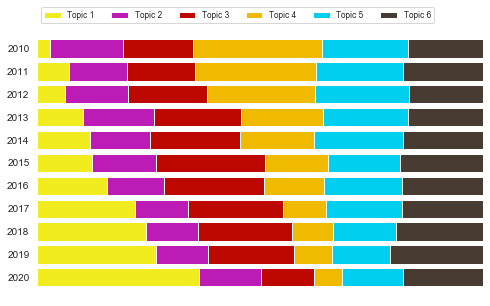

In [51]:
# source: https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = colors

fig, ax = plt.subplots(figsize=(8, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.8,
            label=colname, color=color)
    xcenters = starts + widths / 2


ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


ax.set(frame_on=False)

plt.show()

- Here we can see the trends described above in much better contrast. As Topic 1 increases, topic 2 declines. Collaboration beers (Topic 2) have stayed steadily popular over time, while Topic 6 (darker beers like stouts) has taken a small amount of share from Topic 5 (yeasty, fermented beers).

## Monthly:

In [23]:
# Same process as for annual, but with month_added
month_df = new_df.groupby(['month_added', 'Dominant_Topic'])["Dominant_Topic"].count().reset_index(name = 'count_topics')
month_rat_df = new_df.groupby(['month_added', 'Dominant_Topic'])["rating"].mean().reset_index(name = 'rating_av')
top_over_months_df = pd.merge(month_df, month_rat_df, on=['month_added', 'Dominant_Topic'], how='inner')
top_over_months_df.head(10)

,month_added,Dominant_Topic,count_topics,rating_av
0,1,1.0,278,3.881763
1,1,2.0,214,3.730234
2,1,3.0,313,3.936454
3,1,4.0,158,3.655063
4,1,5.0,242,3.613678
5,1,6.0,346,3.886965
6,2,1.0,310,3.857516
7,2,2.0,206,3.759272
8,2,3.0,300,3.893433
9,2,4.0,189,3.681429


In [24]:
top_over_months_df['count_share'] = top_over_months_df['count_topics'] / top_over_months_df.groupby(['month_added'])['count_topics'].transform('sum')*100

In [25]:
top_over_months_df.head()

,month_added,Dominant_Topic,count_topics,rating_av,count_share
0,1,1.0,278,3.881763,17.923920
1,1,2.0,214,3.730234,13.797550
2,1,3.0,313,3.936454,20.180529
3,1,4.0,158,3.655063,10.186976
4,1,5.0,242,3.613678,15.602837


In [27]:
month_results = {
    'January': top_over_months_df[top_over_months_df['month_added']==1].count_share.to_list(),
    'February': top_over_months_df[top_over_months_df['month_added']==2].count_share.to_list(),
    'March': top_over_months_df[top_over_months_df['month_added']==3].count_share.to_list(),
    'April': top_over_months_df[top_over_months_df['month_added']==4].count_share.to_list(),
    'May': top_over_months_df[top_over_months_df['month_added']==5].count_share.to_list(),
    'June': top_over_months_df[top_over_months_df['month_added']==6].count_share.to_list(),
    'July': top_over_months_df[top_over_months_df['month_added']==7].count_share.to_list(),
    'August': top_over_months_df[top_over_months_df['month_added']==8].count_share.to_list(),
    'September': top_over_months_df[top_over_months_df['month_added']==9].count_share.to_list(),
    'October': top_over_months_df[top_over_months_df['month_added']==10].count_share.to_list(),
    'November': top_over_months_df[top_over_months_df['month_added']==11].count_share.to_list(), 
    'December': top_over_months_df[top_over_months_df['month_added']==12].count_share.to_list()
}

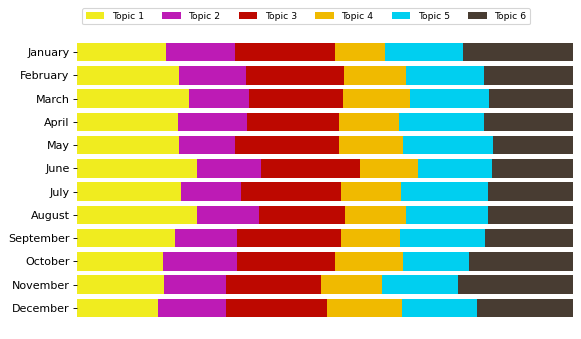

In [33]:
# source: https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

labels = list(month_results.keys())
data = np.array(list(month_results.values()))
data_cum = data.cumsum(axis=1)
category_colors = colors

fig, ax = plt.subplots(figsize=(8, 5), dpi=80)
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.8,
            label=colname, color=color)
    xcenters = starts + widths / 2


ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


ax.set(frame_on=False)

plt.show()

- The seasonal data above does provide some insight, such as Topic 1 (i.e. light, fruity, hoppy beers) being more prevalent in summer months and Topic 6 (i.e. darker, vanilla, coffee and chocolate beers) being added more in the Winter months. Even if these trends are somewhat expected.
- I think the annual trends are much more insightful and so will try to validate what I am seeing there by adding a new dataset below.

# Validating the annual trends I am seeing using US Hops Data:

- The data below was sourced from the United States Department of Agriculture annual Hops Reports - https://usda.library.cornell.edu/concern/publications/s7526c41m

- In Topic 1 I noticed that the words Citra and Mosaic are prominent in the word cloud. From domain knowledge I am aware these hops are in a lot of the most recent, well-rated beers and wondered if there was a trend in hop production that echoes the flavour topics above:

In [52]:
hops_data = pd.read_csv('Datasets/hops_data.csv')

In [53]:
hops_data.head()

,Variety,Year,Area_harvested
0,Cascade,2012,2726
1,Citra,2012,538
2,Mosaic,2012,0
3,Simcoe,2012,940
4,Zeus,2012,2953


From Beer Maverick - https://beermaverick.com/hop/zeus/:
    
    Cascade: Cascade is a dual-purpose hop that can be used in all hop additions throughout the brewing process. Defined by its citrus, and often more specifically grapefruit flavor
    
    Citra: The Citra hop is a high alpha acid hop with a strong, yet smooth floral and citrus aroma and flavor. It has specific aroma descriptors that include grapefruit, citrus, peach, melon, lime, gooseberry, passion fruit and lychee

    Mosaic: Mosaic has quite the complex flavor and aroma profile, which lends to its name. This hop is most noted for its blueberry and tropical aromas

    Simcoe: Simcoe is a dual-purpose hop that can be used in all hop additions throughout the brewing process. Alongside its fruity and slightly earthy aromas, specific descriptors include grapefruit, passion fruit, pine and berry characteristics.
    
    Zeus: Zeus is a bittering hop that is commonly used only to bitter the beer during brewing, and not for too much flavor and aromas.

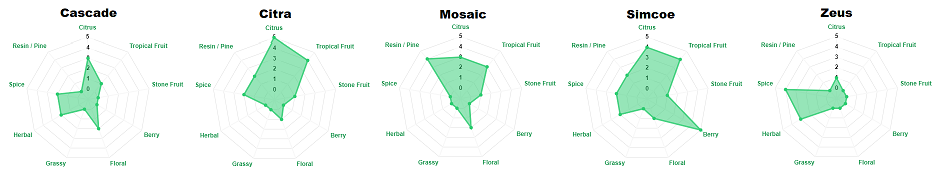

- Looking at the flavour profiles above of the various hops and our diagram of the topics over time, it appears they align as follows:

    Topic 1: Citra and Mosaic - Citrus and Tropical Notes - Expect large increase in acres harvested.
    
    Topic 3: Simcoe - Berry Notes - Expect increase/roughly steady over time
    
    Topic 4 & 5 : Cascade and Zeus - Spice, Bitter, Floral Notes - Expect initial popularity and decline after 2014/15.

In [54]:
hops_pivot = hops_data.pivot(index="Year", columns="Variety", values="Area_harvested").reset_index()

In [55]:
hops_pivot

Variety,Year,Cascade,Citra,Mosaic,Simcoe,Zeus
0,2012,2726,538,0,940,2953
1,2013,5288,1315,382,1298,3825
2,2014,6619,1761,671,1886,4037
3,2015,6790,2993,1800,3306,3650
4,2016,7581,4494,2525,4331,3082
5,2017,6945,5120,2714,4608,3225
6,2018,6174,6382,2438,3988,4088
7,2019,5467,8691,4108,4276,3223


## Line Chart Showing Increases in Hops Acres Harvested Over Time:

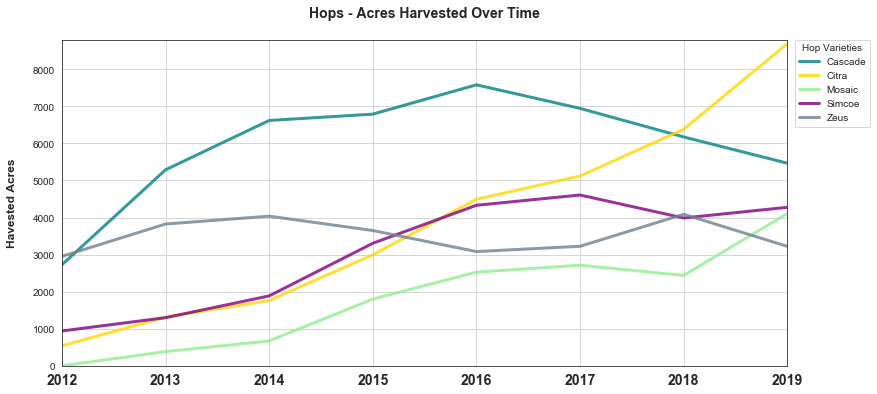

In [68]:
plt.figure(figsize=(13,6))

var_lst = hops_data.Variety.unique().tolist()
clr_lst = ['teal', 'gold', 'lightgreen' , 'purple' , 'slategrey']

for i in range(5):
    plt.plot('Year', var_lst[i], data=hops_pivot, color= clr_lst[i], alpha=0.8, linewidth= 3)

    
# Annotating
plt.xlabel("")
plt.ylabel('Havested Acres\n', fontsize = '12',fontweight="bold")
plt.title('Hops - Acres Harvested Over Time\n', fontsize = '14',fontweight="bold")
plt.xlim(2012,2019)
plt.ylim(0,8800)
plt.xticks(fontsize=14, fontweight = 'bold')

plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title = "Hop Varieties")
plt.show()

- We can see that initially Cascade and Zeus hops were the most popular in 2012, making up the majority of the hops harvested.
- Since then we can see a dramatic change, as Citra and Mosaic, as well as Simcoe to some degree, have risen in popularity.
- It is also interesting to note how many more hops are being harvested in 2019 compared to 2012. These make up the 5 largest hop varieties and it shows how craft beer has kick-started a new crop revolution in the US.

## Looking at the increases in each hop varietal over the last 5 years:

In [60]:
# Calculating 5yr growth:
cas_growth = (hops_pivot[hops_pivot['Year']==2019].Cascade.sum() / 
              hops_pivot[hops_pivot['Year']==2014].Cascade.sum() -1 ) * 100
cit_growth = (hops_pivot[hops_pivot['Year']==2019].Citra.sum() / 
              hops_pivot[hops_pivot['Year']==2014].Citra.sum() -1) * 100
mos_growth = (hops_pivot[hops_pivot['Year']==2019].Mosaic.sum() / 
              hops_pivot[hops_pivot['Year']==2014].Mosaic.sum() -1) * 100
sim_growth = (hops_pivot[hops_pivot['Year']==2019].Simcoe.sum() / 
              hops_pivot[hops_pivot['Year']==2014].Simcoe.sum() -1) * 100
zeu_growth = (hops_pivot[hops_pivot['Year']==2019].Zeus.sum() / 
              hops_pivot[hops_pivot['Year']==2014].Zeus.sum() -1) * 100

In [61]:
growth_lst = [cas_growth, cit_growth, mos_growth, sim_growth, zeu_growth]
growth_df = pd.DataFrame(list(zip(var_lst, growth_lst)), 
               columns =['Variety', 'five_yr_growth']) 

In [62]:
growth_df

,Variety,five_yr_growth
0,Cascade,-17.404442
1,Citra,393.526405
2,Mosaic,512.220566
3,Simcoe,126.723224
4,Zeus,-20.163488


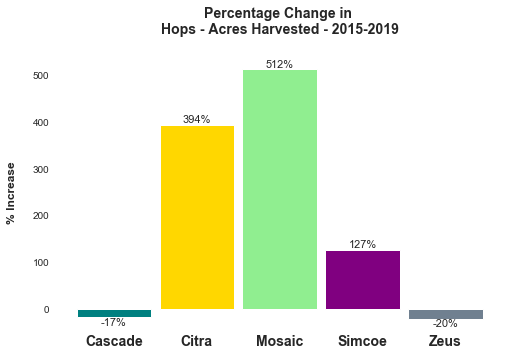

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))

x = growth_df.Variety
n = growth_df.five_yr_growth

ax.bar(x, n, width=0.9, color=clr_lst)

for i in range(len(n)):
    if n[i] <0:
        plt.annotate('%d%%' % int(round(n[i],0)), xy=(x[i],n[i]), 
                     ha='center', va='top', fontsize = '11')
    else:
        plt.annotate('%d%%' % int(round(n[i],0)), xy=(x[i],n[i]), 
                     ha='center', va='bottom', fontsize = '11')
    
# Annotating
plt.xticks(x, fontsize = '14', fontweight="bold")
plt.xlabel("", fontsize = '12')
plt.ylabel('% Increase\n', fontsize = '12',fontweight="bold")
plt.title('Percentage Change in \nHops - Acres Harvested - 2015-2019\n', fontsize = '14',fontweight="bold")
plt.ylim(-40, 540)

ax.set(frame_on=False)

plt.show()

- This provides a more stark comparison of the trend seen in the line chart above and confirms that Citra and Mosaic are currently the trendiest hops to grow and brew with. This correlates well with my Annual Topic chart.